In [1]:
import pandas as pd
import seaborn as sns

In [2]:
fbthrift = pd.read_csv("facebook_fbthrift.csv")
extracted_on = 1607793174 # 12.12.2020

In [3]:
fbthrift

,state,created_at,merged,merge_date,no_comments
0,open,1.605946e+09,False,NaN,0
1,open,1.605859e+09,False,NaN,0
2,open,1.605602e+09,False,NaN,0
3,open,1.605600e+09,False,NaN,0
4,open,1.605527e+09,False,NaN,2
...,...,...,...,...,...
120,closed,1.399647e+09,False,NaN,5
121,closed,1.392933e+09,False,NaN,1
122,closed,1.392933e+09,False,NaN,1
123,closed,1.392932e+09,False,NaN,3


In [4]:
closed_unmerged = fbthrift.query("state == 'closed' & merged == False")
closed_unmerged = closed_unmerged.assign(PR="Rejected")
closed_unmerged

,state,created_at,merged,merge_date,no_comments,PR
6,closed,1.604695e+09,False,NaN,1,Rejected
7,closed,1.603825e+09,False,NaN,3,Rejected
8,closed,1.598958e+09,False,NaN,1,Rejected
9,closed,1.597339e+09,False,NaN,1,Rejected
10,closed,1.591966e+09,False,NaN,2,Rejected
...,...,...,...,...,...,...
120,closed,1.399647e+09,False,NaN,5,Rejected
121,closed,1.392933e+09,False,NaN,1,Rejected
122,closed,1.392933e+09,False,NaN,1,Rejected
123,closed,1.392932e+09,False,NaN,3,Rejected


In [5]:
stale_threshold = extracted_on - 90 * 24 * 60 * 60 # 90 days in seconds
open_stale = fbthrift.query(f"state == 'open' & created_at < {stale_threshold}")
open_stale = open_stale.assign(PR="Stale")
open_stale

,state,created_at,merged,merge_date,no_comments,PR
5,open,1.566964e+09,False,NaN,9,Stale


In [6]:
active_open = fbthrift.query(f"state == 'open' & created_at > {stale_threshold}")
active_open = active_open.assign(PR="Active")
active_open

,state,created_at,merged,merge_date,no_comments,PR
0,open,1.605946e+09,False,NaN,0,Active
1,open,1.605859e+09,False,NaN,0,Active
2,open,1.605602e+09,False,NaN,0,Active
3,open,1.605600e+09,False,NaN,0,Active
4,open,1.605527e+09,False,NaN,2,Active


In [7]:
successful_prs = fbthrift.query(f"state == 'closed' & merged == True")
successful_prs = successful_prs.assign(PR="Successful") 
successful_prs


,state,created_at,merged,merge_date,no_comments,PR
19,closed,1.564501e+09,True,1.564501e+09,0,Successful
24,closed,1.557867e+09,True,1.557870e+09,3,Successful
93,closed,1.438807e+09,True,1.438808e+09,1,Successful
95,closed,1.438643e+09,True,1.453410e+09,0,Successful
96,closed,1.438643e+09,True,1.453410e+09,0,Successful
97,closed,1.438643e+09,True,1.453410e+09,0,Successful
98,closed,1.438642e+09,True,1.453410e+09,0,Successful
100,closed,1.438641e+09,True,1.453409e+09,0,Successful
101,closed,1.438641e+09,True,1.453409e+09,0,Successful
103,closed,1.438639e+09,True,1.453408e+09,0,Successful


<AxesSubplot:xlabel='PR', ylabel='count'>

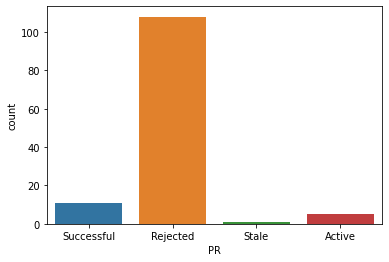

In [8]:
score = pd.concat([successful_prs, closed_unmerged, open_stale, active_open])
sns.countplot(data=score, x="PR")